In [1]:
from IPython.display import Image
Image("home/nati/Pictures/otto_competition.png")

The goals of this tutorial notebook are to:
a) introduce you to the process and approach for performing Exploratory Data Analysis (EDA) 
b) get you train various classifiers and explore their results
c) use these trained models to predict the target variable (in this example dataset it is the type of a product)

lets begin with importing some common libraries we discussed about in the previous part.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split

my_color_map = ['green','aqua','pink','blue','red','black','yellow','teal','orange','grey']

now lets load our data set for this tutorial:
the Otto dataset 

In [3]:
tr_data = pd.read_csv('../input/train.csv')
te_data = pd.read_csv('../input/test.csv')
print 'train shape is: {} \r\n\
test shape is: {}'.format(tr_data.shape,te_data.shape)

train shape is: (61878, 95) 
test shape is: (144368, 94)


pandas has lots of great features that can help us get insights to the data with very little effort
lets begin with exploring some statistics of the numerical features:

In [4]:
tr_data.describe()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15470.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30939.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46408.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61878.000000,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


this format is somewhat problematic since:

1) when we scroll aside we notice that not all columns are presented so we cannot explore them

2) the data is very wide and we're not using the screen very efficiently

we can solve the first problem by setting some of pandas display parameters
as for the screen usage - we can transpose the resulting dataframe 

In [5]:
#set number of rows and columns to see 
pd.options.display.max_rows = 200
pd.options.display.max_columns = 50

#use transposed view of the features
tr_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,61878.0,30939.500000,17862.784315,1.0,15470.25,30939.5,46408.75,61878.0
feat_1,61878.0,0.386680,1.525330,0.0,0.00,0.0,0.00,61.0
feat_2,61878.0,0.263066,1.252073,0.0,0.00,0.0,0.00,51.0
feat_3,61878.0,0.901467,2.934818,0.0,0.00,0.0,0.00,64.0
feat_4,61878.0,0.779081,2.788005,0.0,0.00,0.0,0.00,70.0
feat_5,61878.0,0.071043,0.438902,0.0,0.00,0.0,0.00,19.0
feat_6,61878.0,0.025696,0.215333,0.0,0.00,0.0,0.00,10.0
feat_7,61878.0,0.193704,1.030102,0.0,0.00,0.0,0.00,38.0
feat_8,61878.0,0.662433,2.255770,0.0,0.00,0.0,1.00,76.0
feat_9,61878.0,1.011296,3.474822,0.0,0.00,0.0,0.00,43.0


another great feature of the pandas package is the simplisity 
of exploring the values distribution of the target variable & for each of the feature 

the value counts of the target are:
Class_2    16122
Class_6    14135
Class_8     8464
Class_3     8004
Class_9     4955
Class_7     2839
Class_5     2739
Class_4     2691
Class_1     1929
Name: target, dtype: int64
Axes(0.125,0.125;0.775x0.775)


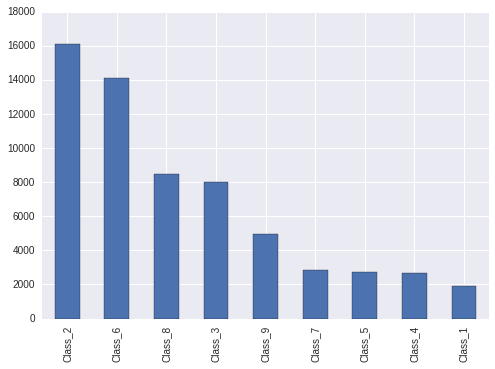

In [6]:
print 'the value counts of the target are:'
print tr_data.iloc[:,-1].value_counts()
print tr_data.iloc[:,-1].value_counts().plot(kind = 'bar')

In [7]:
for i,feat in enumerate(tr_data.columns[1:-1]): #we start from the second feature as the first one is the item id
    print 'the value counts of feature {} are:'.format(feat)
    print tr_data[feat].value_counts()

the value counts of feature feat_1 are:
0     51483
1      5906
2      1829
3       981
4       521
5       471
6       207
7       192
8        71
9        55
22       32
11       24
10       15
13       10
15        8
26        6
19        5
24        5
12        5
28        4
14        4
21        4
23        4
17        4
48        3
16        3
27        3
25        3
39        2
31        2
42        2
43        2
30        2
47        2
56        1
20        1
37        1
34        1
29        1
61        1
32        1
40        1
Name: feat_1, dtype: int64
the value counts of feature feat_2 are:
0     55018
1      4012
2      1215
3       549
4       310
5       170
6       155
7        84
10       60
8        53
9        51
12       41
11       38
14       30
13       17
15       15
16       10
18        8
21        7
17        7
20        5
19        5
25        2
23        2
24        2
26        1
27        1
35        1
36        1
39        1
37        1
22        1
38   

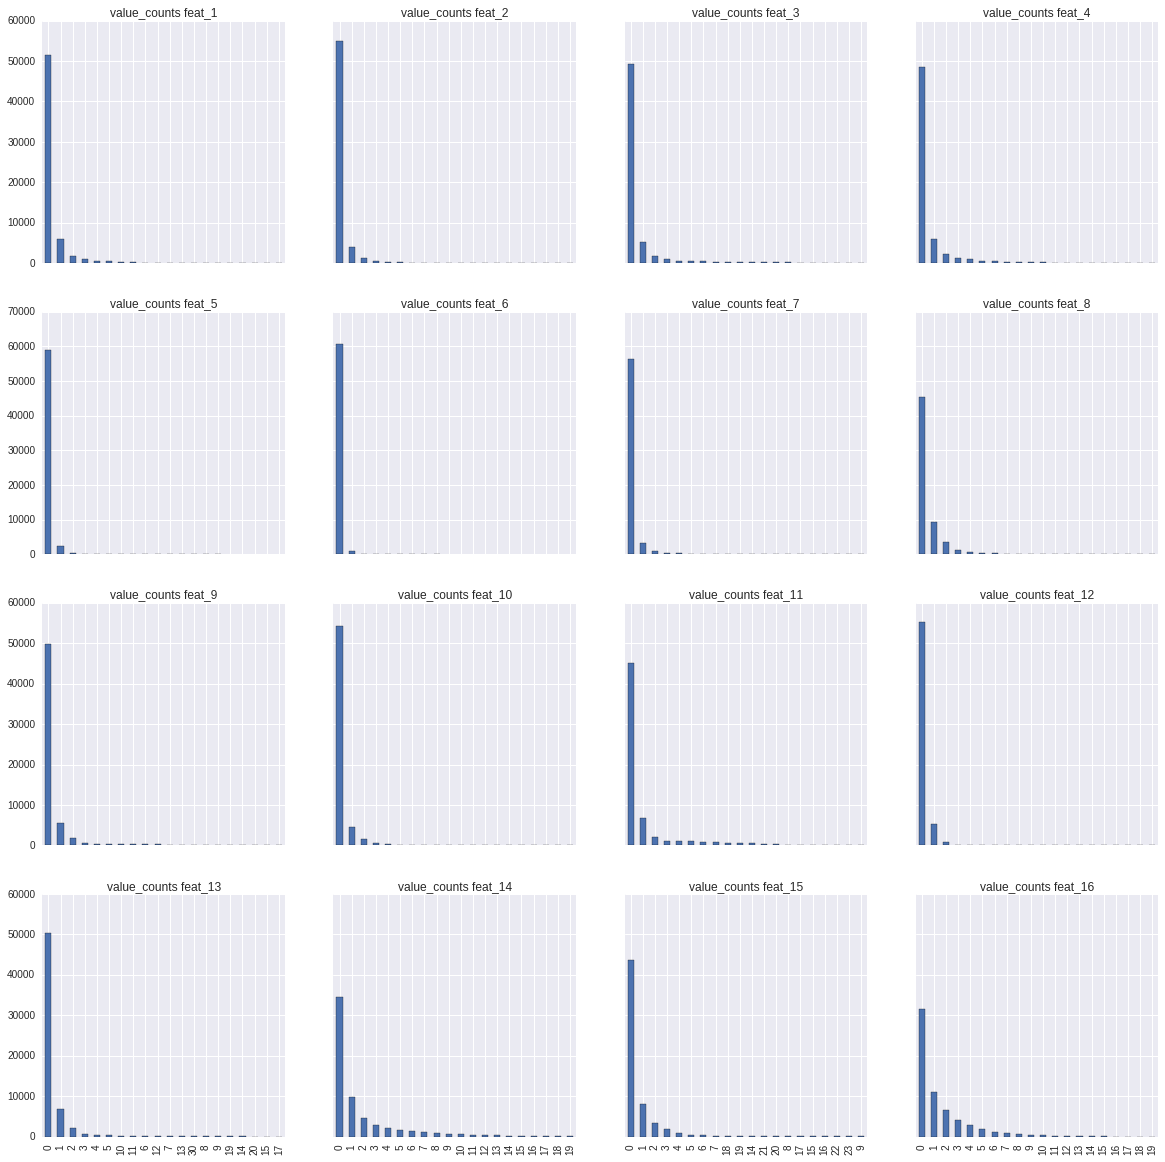

In [8]:
def value_counts_plots(dat,rows = 4, cols = 4):
    _,ax = plt.subplots(rows,cols,sharey='row',sharex='col',figsize = (cols*5,rows*5))
    for i,feat in enumerate(dat.columns[:(rows*cols)]):
        dat[feat].value_counts().iloc[:20].plot(kind = 'bar',ax=ax[i/cols, i%cols],title='value_counts {}'.format(feat))

value_counts_plots(tr_data.iloc[:,1:17],4,4)

In [9]:
cor_mat = tr_data.iloc[:,1:-1].corr()

In [10]:
cor_mat

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,...,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
feat_1,1.000000,0.031332,-0.027807,-2.752941e-02,0.042973,0.043603,0.298952,0.056321,-0.032285,0.097776,-0.042928,0.056934,0.139254,0.063517,-0.045738,0.027086,0.053004,0.084856,2.302499e-03,0.070511,-0.027026,0.063283,0.048686,0.067255,0.187237,...,0.007544,0.165442,0.013712,-0.029983,0.140815,0.051365,0.011596,0.153808,0.123752,0.279202,0.228912,-0.013303,0.032427,-0.026085,0.059165,0.049634,-0.008739,0.107947,0.089374,0.020830,0.096851,0.010310,0.037264,0.054777,0.081783
feat_2,0.031332,1.000000,0.082573,1.349870e-01,0.020926,0.041343,0.222386,0.019815,-0.025630,0.051925,0.118534,0.090153,0.157467,-0.070057,-0.048798,0.108046,0.074902,0.242716,1.766549e-01,0.449160,0.014113,0.215106,0.162065,0.253684,-0.096366,...,0.307406,0.112968,-0.002336,-0.023267,0.039192,0.070724,0.093689,0.259360,0.014911,0.094256,0.033668,0.155768,0.052101,0.119109,0.371691,0.009845,-0.006764,-0.039090,0.047451,-0.047035,0.105527,0.515022,0.026383,-0.008219,0.054593
feat_3,-0.027807,0.082573,1.000000,5.835232e-01,0.010880,0.004288,0.001294,-0.053462,-0.063551,0.036944,0.596243,0.050037,0.013870,-0.111105,-0.065285,0.221426,-0.023093,0.115655,-1.222845e-02,-0.011069,0.354925,0.251082,-0.002427,-0.031596,-0.157459,...,-0.032748,-0.018774,-0.053020,-0.045339,-0.013972,0.041559,-0.044724,-0.028670,-0.001584,-0.021979,-0.020566,0.442036,0.013089,0.438458,-0.019914,0.011159,-0.048626,-0.096093,-0.009838,-0.082336,0.174781,-0.015068,-0.012417,0.066921,0.006814
feat_4,-0.027529,0.134987,0.583523,1.000000e+00,0.017290,0.014059,0.014490,-0.046184,-0.046250,0.059514,0.389409,0.057434,0.028973,-0.099215,-0.051222,0.211078,-0.007554,0.214895,-3.519107e-07,0.044657,0.232923,0.247738,0.030622,0.003728,-0.134231,...,-0.014461,0.020798,-0.042413,-0.029796,-0.011285,0.049097,-0.031454,-0.013792,0.015318,-0.014499,-0.010835,0.405772,0.028284,0.436541,-0.001052,0.005684,-0.033153,-0.071029,0.005055,-0.067484,0.183715,0.009454,-0.010312,0.087631,0.015746
feat_5,0.042973,0.020926,0.010880,1.729026e-02,1.000000,0.145355,0.075047,0.035861,-0.024708,0.091324,0.004882,0.036668,0.059081,-0.037607,-0.007000,0.062877,0.062197,0.052186,-8.555966e-03,0.046200,0.003288,0.075161,0.017281,0.075222,-0.003610,...,-0.003294,0.118510,0.056428,0.005177,0.001609,0.017265,0.015279,0.035570,0.030462,0.070709,0.055115,0.026223,0.129333,0.057400,0.008006,0.467329,0.034062,0.013879,0.013999,-0.019201,0.119951,0.004842,0.012012,0.065331,0.002038
feat_6,0.043603,0.041343,0.004288,1.405895e-02,0.145355,1.000000,0.088014,0.012867,-0.009373,0.041940,0.014504,0.028588,0.036293,-0.027350,-0.018328,0.021934,0.015488,0.048710,3.849262e-02,0.057813,0.008046,0.038939,0.043651,0.082124,-0.023319,...,0.074836,0.052401,0.011901,-0.011090,0.025023,0.043160,0.006951,0.073867,0.006501,0.061250,0.009942,0.017648,0.044136,0.014907,0.035145,0.177777,0.004290,0.010455,0.015256,-0.015437,0.035042,0.054034,0.012465,0.015479,0.008521
feat_7,0.298952,0.222386,0.001294,1.448981e-02,0.075047,0.088014,1.000000,0.038121,-0.027146,0.194258,0.012418,0.056230,0.199142,-0.044671,-0.035721,0.043957,0.127245,0.098972,5.807104e-02,0.364972,-0.022908,0.162620,0.186462,0.244813,-0.048820,...,0.131430,0.237907,0.115813,-0.014921,0.022819,0.053059,0.039865,0.375114,0.005769,0.567084,0.066753,0.028860,0.144308,0.022059,0.282069,0.062634,0.037874,-0.009169,0.089574,-0.033646,0.063511,0.129578,0.068506,-0.032261,0.034912
feat_8,0.056321,0.019815,-0.053462,-4.618407e-02,0.035861,0.012867,0.038121,1.000000,-0.039281,-0.000023,-0.065923,0.091424,0.095365,-0.061799,-0.056960,-0.004659,0.173912,0.087777,1.938742e-02,0.062595,-0.041095,0.029032,0.012774

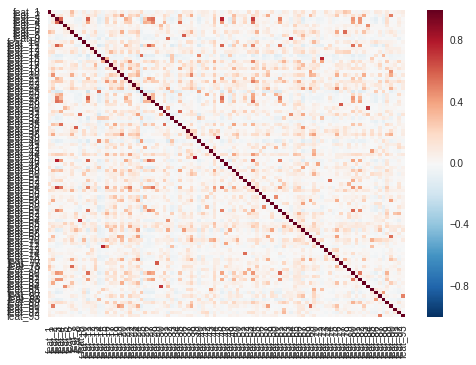

In [11]:
sns.heatmap(cor_mat)

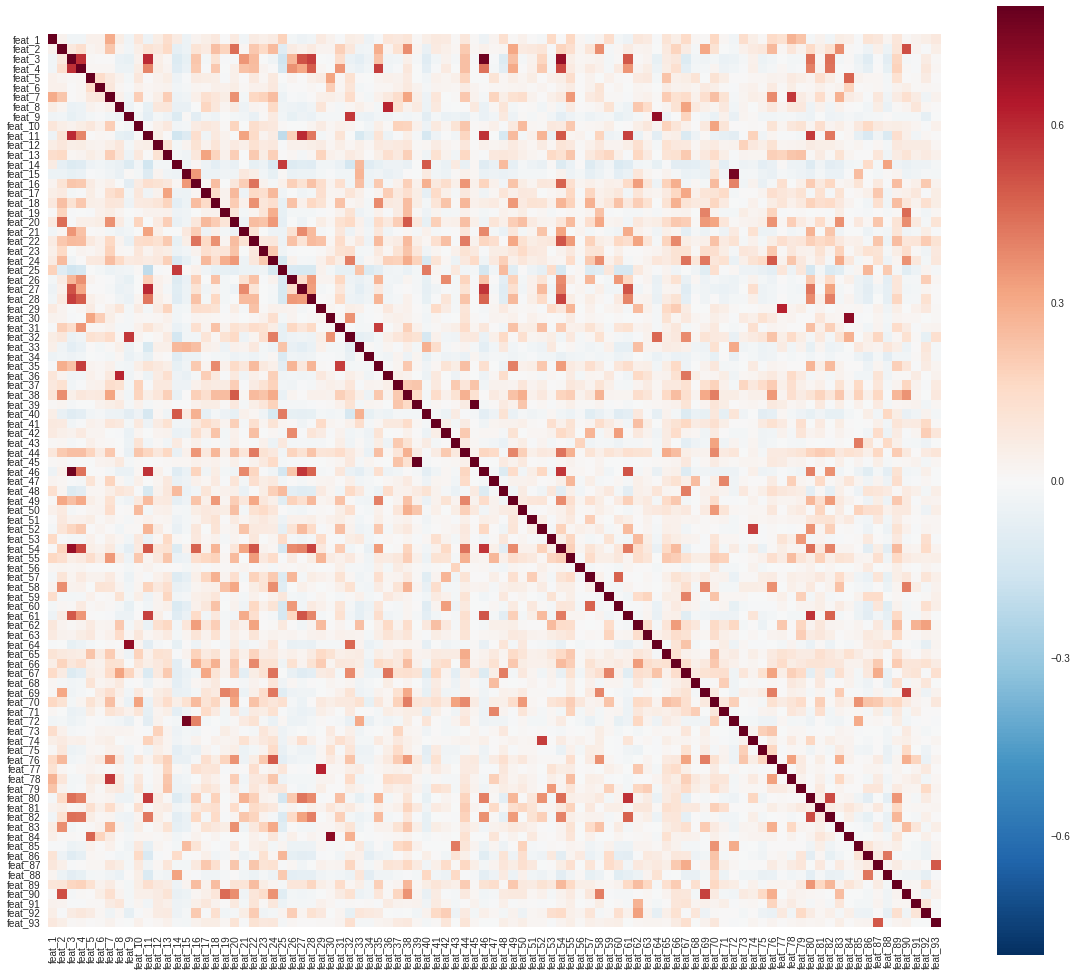

In [12]:
#to have a better look we need to increase the plot area
f, ax = plt.subplots(figsize=(20,17))
sns.heatmap(cor_mat,vmax=0.8,square=True)

we would also like to explore the correlation with the target variable but it has a character type
so let's convert it into a numerical feature

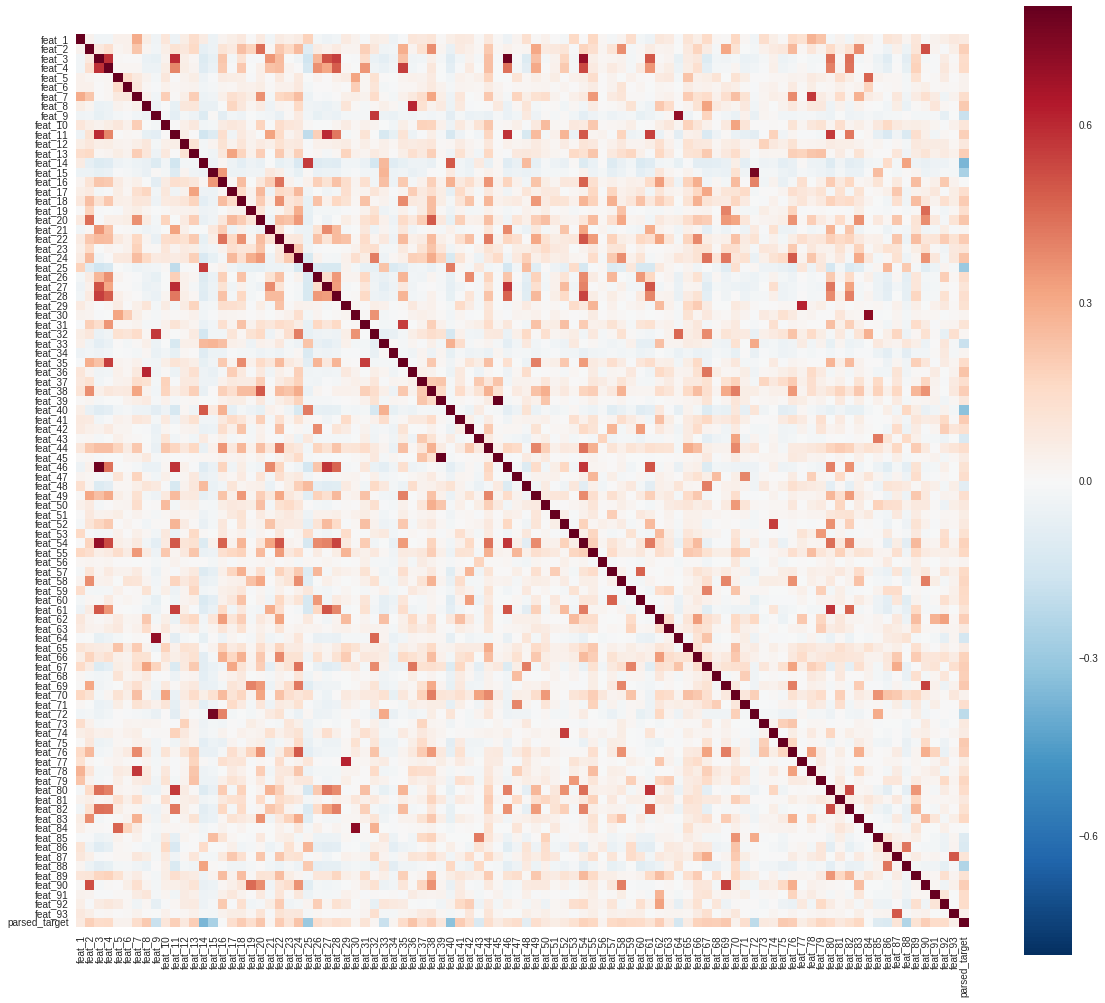

In [13]:
tr_data['parsed_target'] = [int(n.split('_')[1]) for n in tr_data.target]
tr_data.drop('target',axis=1,inplace=True)
f, ax = plt.subplots(figsize=(20,17))
cor_mat = tr_data.iloc[:,1:].corr()
sns.heatmap(cor_mat,vmax=0.8,square=True)

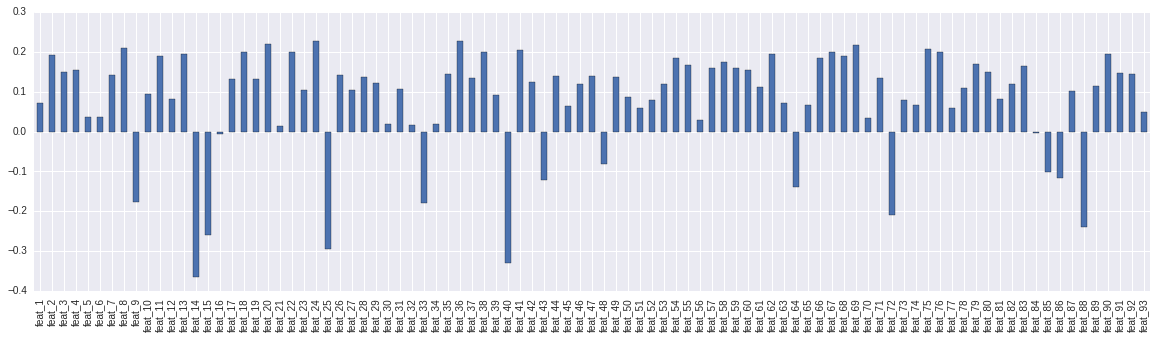

In [14]:
f, ax = plt.subplots(figsize = (20,5))
cor_mat.iloc[:-1,-1].plot(kind = 'bar')

we can notice some features with weak positive corelation with the target and some others with moderate negative correlation

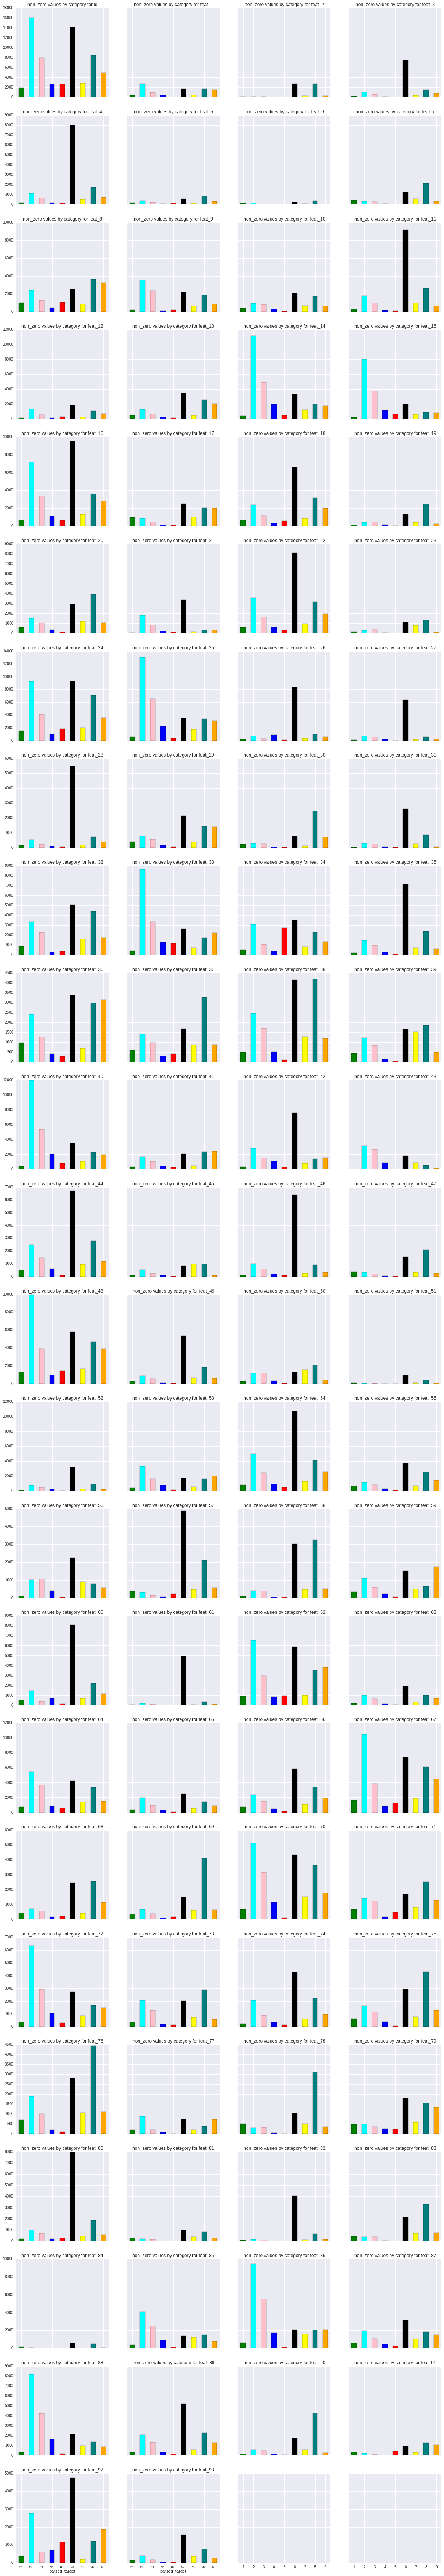

In [15]:
def target_bar_plots(dat,cols = 4, rows = 4):
    _,ax = plt.subplots(rows,cols,sharey='row',sharex='col',figsize = (cols*5,rows*5))
    for i,feat in enumerate(dat.columns[:(rows*cols)]):
        try:
            dat.pivot_table(index=['parsed_target'],values=dat.columns[i],aggfunc=np.count_nonzero).plot(
                kind = 'bar',color=my_color_map ,ax=ax[i/cols, i%cols],title = 
                'non_zero values by category for {}'.format(feat))
        except: 
            pass

target_bar_plots(tr_data,4,24)

while examining these plots we can already make some assumptions 

as to which categories will be easier to predict and which will be the harder ones - can you guess? 

now lets look at the test set features and check if they resemble the train features

In [16]:
tr_data['source'] = 'train'
te_data['source'] = 'test'
all_data = pd.concat([tr_data,te_data],axis=0)
tr_data.drop('source',axis=1,inplace=True)
te_data.drop('source',axis=1,inplace=True)

In [17]:
[x for x in all_data.columns[1:7]]

['feat_10', 'feat_11', 'feat_12', 'feat_13', 'feat_14', 'feat_15']

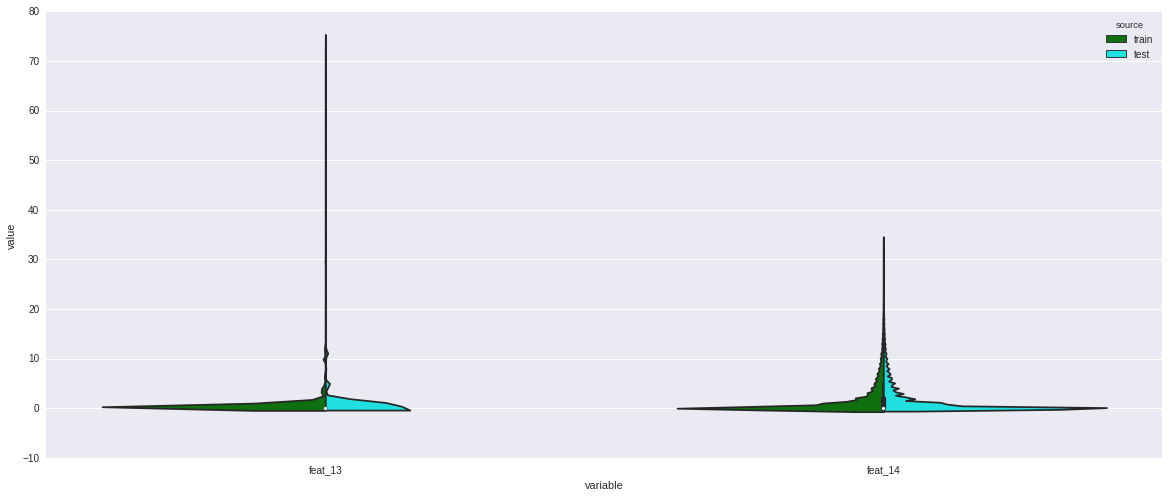

In [18]:

molten = pd.melt(all_data, id_vars = 'source',value_vars = ['feat_'+str(x) for x in range(13,15)])
plt.subplots(figsize = (20,8))
sns.violinplot(data=molten, x= 'variable',y='value',hue='source',split = True,palette=my_color_map)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(tr_data.iloc[:,1:-1],tr_data.parsed_target,test_size = 0.2,random_state =12345)

[[ 247   20    3    2    3   20    9   34   72]
 [   5 2723  413   47    6    4   15    5    4]
 [   1  817  663   41    1    1   21    4    1]
 [   3  225  126  169    8   11   13    1    1]
 [   1   11    3    0  520    0    0    0    0]
 [  34   29    7    6    2 2652   32   28   20]
 [  31   80   55   10    4   37  300   18    3]
 [  51   21    8    0    2   60   24 1496   33]
 [  71   27    6    2    4   32    2   36  879]]


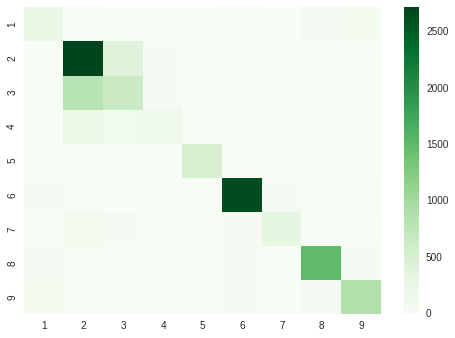

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(n_jobs=4,n_neighbors=4)
knn.fit(X_train,y_train)
knn4_pred = knn.predict(X_val)
print confusion_matrix(y_pred=knn4_pred,y_true=y_val)
sns.heatmap(xticklabels=range(1,10),yticklabels=range(1,10),data = confusion_matrix(y_pred=knn4_pred,y_true=y_val),cmap='Greens')

as we can see our assamption was indeed correct - categories 6,8 and 2 are those easiest to predict

In [21]:
from sklearn.metrics import classification_report
print 'classification report results:\r\n' + classification_report(y_pred=knn4_pred,y_true=y_val)

classification report results:
             precision    recall  f1-score   support

          1       0.56      0.60      0.58       410
          2       0.69      0.85      0.76      3222
          3       0.52      0.43      0.47      1550
          4       0.61      0.30      0.41       557
          5       0.95      0.97      0.96       535
          6       0.94      0.94      0.94      2810
          7       0.72      0.56      0.63       538
          8       0.92      0.88      0.90      1695
          9       0.87      0.83      0.85      1059

avg / total       0.78      0.78      0.77     12376



[[ 143   21   10    2    3   44   21   71   95]
 [  19 2197  679  175   13   35   40   30   34]
 [   2  630  738   79    4   16   53   17   11]
 [   4  144   67  272    5   32   21    9    3]
 [   0   13    5    3  508    1    2    1    2]
 [  33   38   26   29    1 2512   55   69   47]
 [  21   64   52   18    3   46  260   44   30]
 [  57   30   24    6    8  101   42 1365   62]
 [  80   62   15    8    8   54   25   57  750]]
classification report results:
             precision    recall  f1-score   support

          1       0.40      0.35      0.37       410
          2       0.69      0.68      0.68      3222
          3       0.46      0.48      0.47      1550
          4       0.46      0.49      0.47       557
          5       0.92      0.95      0.93       535
          6       0.88      0.89      0.89      2810
          7       0.50      0.48      0.49       538
          8       0.82      0.81      0.81      1695
          9       0.73      0.71      0.72      1059

avg 

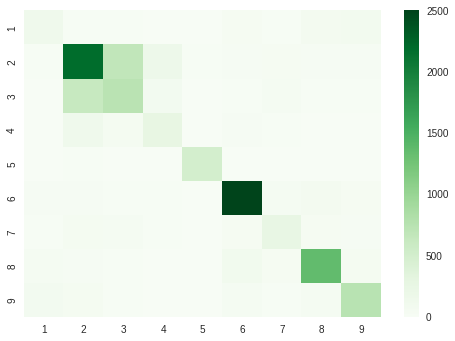

In [22]:
#this will give higher importance to successfully classifying the 4th class items
class_weights = {1:1,2:1,3:1,4:10,5:1,6:1,7:1,8:1,9:1}

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(class_weight=class_weights,max_depth=100,max_features=92,min_samples_split=2,random_state=12345)
dtc.fit(X_train,y_train)
tree_pred = dtc.predict(X_val)
print confusion_matrix(y_pred=tree_pred,y_true=y_val)
sns.heatmap(confusion_matrix(y_pred=tree_pred,y_true=y_val),cmap='Greens',xticklabels=range(1,10),yticklabels=range(1,10))
print 'classification report results:\r\n' + classification_report(y_pred=tree_pred,y_true=y_val)

lets see if support vector machines will do any better

/usr/local/lib/python2.7/dist-packages/sklearn/svm/base.py:220: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[[  46    2    1    6    2    3   53   79  218]
 [   5  661  530 1417   32    0  516   34   27]
 [   1  292  437  514    7    0  272   18    9]
 [   3   79   28  349    9    1   78    1    9]
 [   0    1    6    3  523    0    1    0    1]
 [ 326   35   37  181    0  788  947  241  255]
 [  20   42   33   25    1   18  353   30   16]
 [  97    4   14    3    2  100  232  923  320]
 [ 190    1    1   13    2   17   11   33  791]]
classification report results:
             precision    recall  f1-score   support

          1       0.07      0.11      0.08       410
          2       0.59      0.21      0.30      3222
          3       0.40      0.28      0.33      1550
          4       0.14      0.63      0.23       557
          5       0.90      0.98      0.94       535
          6       0.85      0.28      0.42      2810
          7       0.14      0.66      0.24       538
          8       0.68      0.54      0.60      1695
          9       0.48      0.75      0.58      1059

avg 

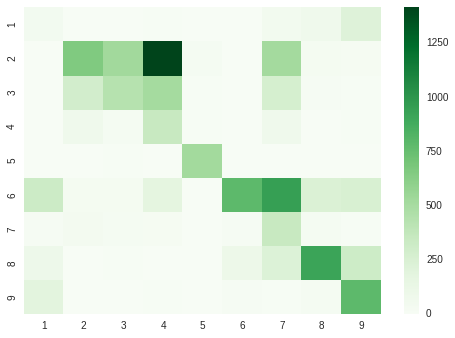

In [23]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',C=0.1,max_iter=1000,random_state=12345)
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_val)
print confusion_matrix(y_pred=svc_pred,y_true=y_val)
sns.heatmap(confusion_matrix(y_pred=svc_pred,y_true=y_val),cmap='Greens',xticklabels=range(1,10),
            yticklabels=range(1,10))
print 'classification report results:\r\n' + classification_report(y_pred=svc_pred,y_true=y_val)

we can see that we get less accurate results on the whole, 

but we achieved better results for the class we selected to be more important 

lets try ensamble learning - we'll start with random forest

[[ 169   16    1    0    0   35    8   85   96]
 [   0 2846  335   10    4    6    9    5    7]
 [   0  733  780   14    0    2   13    7    1]
 [   1  211   77  232    3   20   10    3    0]
 [   0   10    1    0  521    1    0    1    1]
 [   6   27    2    2    1 2698   22   35   17]
 [   4   71   41    9    1   44  319   42    7]
 [  12   12    4    0    2   50    6 1587   22]
 [  19   24    2    0    2   29    4   38  941]]
classification report results:
             precision    recall  f1-score   support

          1       0.80      0.41      0.54       410
          2       0.72      0.88      0.79      3222
          3       0.63      0.50      0.56      1550
          4       0.87      0.42      0.56       557
          5       0.98      0.97      0.97       535
          6       0.94      0.96      0.95      2810
          7       0.82      0.59      0.69       538
          8       0.88      0.94      0.91      1695
          9       0.86      0.89      0.87      1059

avg 

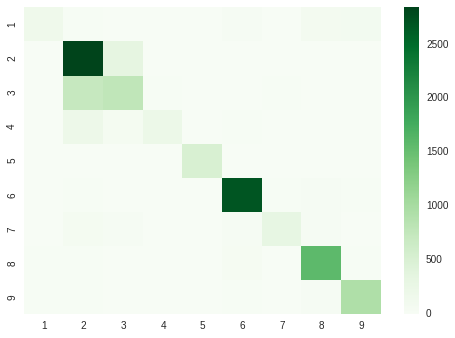

In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=4,min_impurity_split=1e-05,n_estimators=100)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_val)
print confusion_matrix(y_pred=rfc_pred,y_true=y_val)
sns.heatmap(confusion_matrix(y_pred=rfc_pred,y_true=y_val),cmap='Greens',xticklabels=range(1,10),yticklabels=range(1,10))
print 'classification report results:\r\n' + classification_report(y_pred=rfc_pred,y_true=y_val)

yes!

rf model got highest score so far with no special effort just applying fit - predict

let's check if gradient boosting can further improve on that

[[ 214   18    2    0    1   30   11   50   84]
 [   1 2724  419   33    5    5   19   14    2]
 [   0  620  839   37    0    3   43    5    3]
 [   0  162   83  274    4   16   13    3    2]
 [   1    5    4    0  524    1    0    0    0]
 [  12   17    6    8    0 2687   32   30   18]
 [   7   53   44    4    1   32  375   22    0]
 [  24    9    5    1    3   45   17 1566   25]
 [  35   20    1    1    1   29    3   37  932]]
classification report results:
             precision    recall  f1-score   support

          1       0.73      0.52      0.61       410
          2       0.75      0.85      0.80      3222
          3       0.60      0.54      0.57      1550
          4       0.77      0.49      0.60       557
          5       0.97      0.98      0.98       535
          6       0.94      0.96      0.95      2810
          7       0.73      0.70      0.71       538
          8       0.91      0.92      0.92      1695
          9       0.87      0.88      0.88      1059

avg 

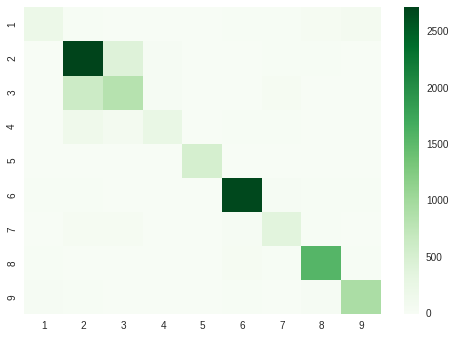

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(min_impurity_split=1e-05,n_estimators=100,max_depth=7)
gbc.fit(X_train,y_train)
gbc_pred = gbc.predict(X_val)
print confusion_matrix(y_pred=gbc_pred,y_true=y_val)
sns.heatmap(confusion_matrix(y_pred=gbc_pred,y_true=y_val),cmap='Greens',xticklabels=range(1,10),yticklabels=range(1,10))
print 'classification report results:\r\n' + classification_report(y_pred=gbc_pred,y_true=y_val)

wow! we got an average F1 score of 82% this looks great!

lets predict the results on the test set using the gradient boosting model and create a submission  to the kaggle platform

In [26]:
test_pred = gbc.predict_proba(te_data.iloc[:,1:])


In [27]:
subm = pd.DataFrame(test_pred)
subm.columns = ['class_'+ str(x) for x in range(1,10)]
subm.index = te_data.id
subm.to_csv('../subm/gradient_boosting_classifier_submission.csv')

In [28]:
#lets make sure our prediction fits the desired format:
print subm.head()
print 'submission shape: {}'.format(subm.shape)
print ''
print "great! we're good to go on and submit our results"

     class_1   class_2   class_3   class_4   class_5   class_6   class_7  \
id                                                                         
1   0.000588  0.102009  0.200167  0.684847  0.000030  0.001411  0.007599   
2   0.003356  0.090358  0.009055  0.004860  0.000256  0.724626  0.021677   
3   0.000420  0.000457  0.000444  0.000575  0.000006  0.995546  0.000392   
4   0.001570  0.710096  0.249005  0.028145  0.000029  0.001276  0.002030   
5   0.025541  0.004113  0.002842  0.000935  0.000610  0.012384  0.003886   

     class_8   class_9  
id                      
1   0.002586  0.000762  
2   0.142966  0.002846  
3   0.001804  0.000357  
4   0.001777  0.006072  
5   0.162684  0.787004  
submission shape: (144368, 9)

great! we're good to go on and submit our results


#home assignment:
* go over the things we learned
* write down terms which are not clear to you - and try to find your answers online
* try to write the code yourself rather than just pressing ctrl+enter
* improve the initial results that we got on class 
    - you can use the kaggle forums to check what other participants have done through the competition
    - think how can we further extract value from the plots we have made
    - you can try and improve one or more of the parameters that we learned about
    - try and combine more than one model (average/weighted average etc.) 
* select a dataset that interests you and create 2-3 plots that show something interesting about it